In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### Prendo come riferimento il modello LSTM e il Linear SVM

In [3]:
lstm_df = pd.read_csv('LSTM/cohen_kappa.csv', header=[0], index_col=[0], skiprows=[1])
print('Evidenziando i valori massimi...')
display(lstm_df.style.highlight_max(axis=1, color='lightgreen').format('{:.2f}'))
display(lstm_df.mean())

dummy_df = pd.read_csv('dummy_classifier/cohen_kappa.csv', header=[0,1], index_col=[0])\
                .loc[:,(['delaunay','au_intensities','au_activations','au_intensities_activations'], ['none'])]  # select the pose=none columns
print('Evidenziando i valori massimi...')
display(dummy_df.style.highlight_max(axis=1, color='lightgreen').format('{:.2f}'))
dummy_df.mean()


Evidenziando i valori massimi...


,delaunay,au_intensities,au_activations,au_intensities_activations
anger,0.02,0.08,0.03,0.03
disgust,-0.01,0.08,0.02,0.00
fear,0.00,0.04,0.01,0.06
happiness,0.08,0.33,0.26,0.35
sadness,0.01,0.04,-0.06,0.15
surprise,0.01,0.10,0.11,0.02
valence,0.07,0.18,0.16,0.20


delaunay                      0.025714
au_intensities                0.121429
au_activations                0.075714
au_intensities_activations    0.115714
dtype: float64

Evidenziando i valori massimi...


features,delaunay,au_intensities,au_activations,au_intensities_activations
pose,none,none,none,none
emotion,,,,
anger,-0.08,0.08,-0.01,0.01
disgust,-0.00,-0.04,-0.00,-0.03
fear,-0.00,0.05,0.02,-0.02
happiness,0.02,0.06,0.06,-0.07
sadness,0.05,-0.10,0.03,0.03
surprise,-0.07,-0.00,0.10,0.02
valence,0.03,-0.06,-0.01,0.07


features                    pose
delaunay                    none   -0.007143
au_intensities              none   -0.001429
au_activations              none    0.027143
au_intensities_activations  none    0.001429
dtype: float64

#### Confronto con il Dummy classifier

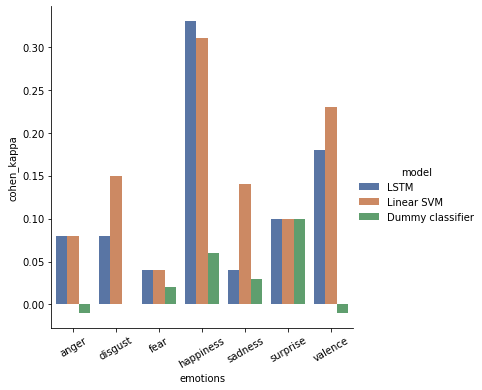

In [3]:
lstm_df = pd.read_csv('LSTM/cohen_kappa.csv', header=[0], index_col=[0], skiprows=[1]).loc[:,(['au_intensities'])].rename(columns={'au_intensities':'LSTM'})
linear_df = pd.read_csv('linear_SVM/cohen_kappa.csv', header=[0,1], index_col=[0])\
                .loc[:,(['delaunay','au_intensities','au_activations','au_intensities_activations'], ['none'])]\
                .loc[:,(['au_intensities'])].droplevel(axis=1,level=1).rename(columns={'au_intensities':'Linear SVM'})
dummy_df = pd.read_csv('dummy_classifier/cohen_kappa.csv', header=[0,1], index_col=[0])\
                .loc[:,(['delaunay','au_intensities','au_activations','au_intensities_activations'], ['none'])]\
                .loc[:,(['au_activations'])].droplevel(axis=1,level=1).rename(columns={'au_activations':'Dummy classifier'})

dummy_comparison_df = pd.concat([lstm_df, linear_df, dummy_df], axis=1)
dummy_comparison_df = dummy_comparison_df.reset_index().rename(columns={'index':'emotions'}).melt(id_vars='emotions', var_name='model', value_name='cohen_kappa')

fg = sns.catplot(data=dummy_comparison_df, x='emotions', y='cohen_kappa', hue='model', kind='bar', palette='deep')
fg.set_xticklabels(rotation=30)
plt.show()

Confronto con i valori del paper

,LSTM,Linear SVM,xgboost
anger,0.08,0.08,0.12
disgust,0.08,0.15,0.08
fear,0.04,0.04,0.02
happiness,0.33,0.31,0.34
sadness,0.04,0.14,0.06
surprise,0.10,0.10,0.17
valence,0.18,0.23,0.21


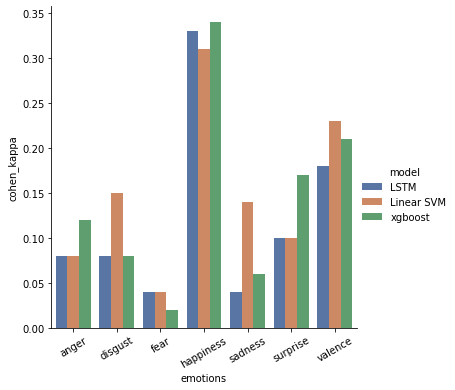

In [5]:
columns = ['anger','disgust','fear','happiness','sadness','surprise','valence']
data = np.array([[0.12, 0.08, 0.02, 0.34, 0.06, 0.17, 0.21]])
paper_results = pd.DataFrame(data=data, columns=columns, index=['xgboost']).T
paper_comparison_df = pd.concat([lstm_df, linear_df, paper_results], axis=1)
display(paper_comparison_df.style.highlight_max(axis=1,color='lightgreen').format('{:.2f}'))
    
paper_comparison_df = paper_comparison_df.reset_index().rename(columns={'index': 'emotions'}).melt(id_vars='emotions', var_name='model', value_name='cohen_kappa')
fg = sns.catplot(data=paper_comparison_df, x='emotions', y='cohen_kappa', hue='model', kind='bar', palette='deep')
fg.set_xticklabels(rotation=30)
plt.show()

# Medioni

## Confronto con il dummy classifier

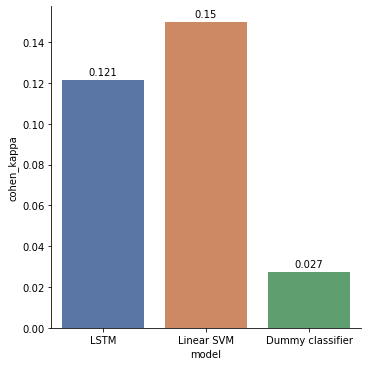

In [6]:
dummy_comparison_df = pd.concat([lstm_df, linear_df, dummy_df], axis=1).mean().reset_index().rename(columns={'index':'model', 0:'cohen_kappa'})
fg = sns.catplot(data=dummy_comparison_df, x='model', y='cohen_kappa', kind='bar', palette='deep')

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fg.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [round(dummy_comparison_df.cohen_kappa, 3).values[i] for i,v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='edge', padding=3)

plt.show()

## Confronto con il paper

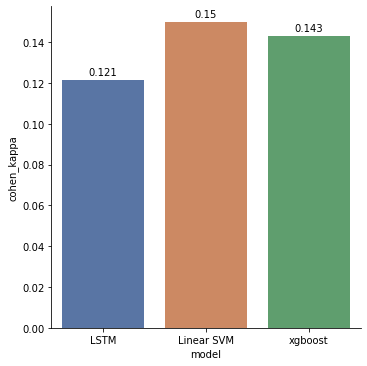

In [7]:
data = np.array([[0.12, 0.08, 0.02, 0.34, 0.06, 0.17, 0.21]])
paper_results = pd.DataFrame(data=data, columns=columns, index=['xgboost']).T

paper_comparison_df = pd.concat([lstm_df, linear_df, paper_results], axis=1).mean().reset_index().rename(columns={'index':'model', 0:'cohen_kappa'})
fg = sns.catplot(data=paper_comparison_df, x='model', y='cohen_kappa', kind='bar', palette='deep')

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fg.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [round(paper_comparison_df.cohen_kappa, 3).values[i] for i,v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='edge', padding=3)

plt.show()